# Practicum Data Augmentation

## Imports

In [61]:
# Voeg imports toe als je ze nodig hebt

## Bronnen

EuroSAT project: https://github.com/phelber/eurosat

Pytorch Vision: https://pytorch.org/vision/stable/index.html

## Context

De hoeveelheid data is vaak de beperkende factor in machine learning met convolution neural nets (CNN). In dit practicum vergroten we de EuroSAT dataset kunstmatig, zodat ons CNN meer variatie ziet om van te leren.

## Opdrachten

### Opdracht 1: dataset downloaden

Download de EuroSAT_RGB dataset.

Zie https://zenodo.org/record/7711810#.ZAm3k-zMKEA voor de beschrijving.

In [62]:
# Extra: kun je de dataset ook met python downloaden?

# Hint: gebruik de requests module

### Opdracht 2: dataset inspecteren

Unzip de EuroSAT_RGB.zip in de folder van dit notebook (. path) en bekijk de inhoud.

In [63]:
# Extra: kun je de dataset ook met python unzippen?

# Hint: gebruik de zipfile module

### Opdracht 3: afbeelding inladen

PyTorch Vision maakt het inladen van afbeeldingen gemakkelijk via:

https://pytorch.org/vision/stable/io.html

In [64]:
# a. Localiseer de afbeelding 'Industrial_1.jpg'

# b. Wat is het relative pad van 'Industrial_1.jpg'?

# c. Bekijk de documentatie van de PyTorch io module

# d. Laad de afbeelding 'Industrial_1.jpg' in (variable 'industrial')

In [65]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import io
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import torchvision

# Path to the input image
img_path = "./../../../pics/2750/Industrial/Industrial_1001.jpg"

# Read the image using PyTorch's io module
industrial = io.read_image(img_path)



### Opdracht 4: afbeelding tonen

PyTorch Vision maakt ook het tonen van afbeeldingen gemakkelijk.

In [66]:
# a. Bekijk het overzicht op https://pytorch.org/vision/stable/index.html

# b. Kun je iets vinden waarmee je een afbeelding kunt tonen?

# c. Toon de afbeelding 'Industrial_1.jpg'

In [67]:

img = Image.open(img_path)

# Show the input image
img.show()


### Opdracht 5: afbeelding bewerken

Ook augmentatie maakt PyTorch Vision makkelijk.

In [68]:
# a. Welke module is bedoeld voor het bewerken van afbeeldingen?

# b. Schaal de afbeelding op naar 2x de originele grootte (variable 'industrial_2x')

# c. Voer een willekeurige rotatie uit op de vergrote afbeelding (variable 'industrial_2x_rot')

# d. Converteer de bewerkte afbeelding naar grijstinten (variable 'industrial_2x_rot_gray')

# e. Sla de bewerkte afbeeldingen op

# f. Toon alle varianten in een grid

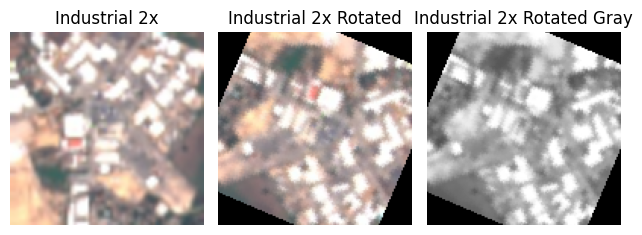

In [74]:
#Schaal de afbeelding op naar 2x de originele grootte (variable 'industrial_2x')
transform_2x = transforms.Resize((industrial.shape[1] * 2, industrial.shape[2] * 2))
industrial_2x = transform_2x(industrial)

#Voer een willekeurige rotatie uit op de vergrote afbeelding (variable 'industrial_2x_rot'
transform_rot = transforms.RandomRotation(degrees=(-180, 180))
industrial_2x_rot = transform_rot(industrial_2x)

#Converteer de bewerkte afbeelding naar grijstinten (variable 'industrial_2x_rot_gray')
transform_gray = transforms.Grayscale()
industrial_2x_rot_gray = transform_gray(industrial_2x_rot)

#save
# Normalize the tensor values to the range [0, 1]
industrial_2x = industrial_2x / 255.0
industrial_2x_rot = industrial_2x_rot / 255.0
industrial_2x_rot_gray = industrial_2x_rot_gray / 255.0

# Save the edited images
torchvision.utils.save_image(industrial_2x, "industrial_2x.jpg")
torchvision.utils.save_image(industrial_2x_rot, "industrial_2x_rot.jpg")
torchvision.utils.save_image(industrial_2x_rot_gray, "industrial_2x_rot_gray.jpg")


# Create a grid of subplots
fig, axs = plt.subplots(1, 3)

# Plot the images in the subplots
axs[0].imshow(industrial_2x.permute(1, 2, 0))
axs[0].set_title("Industrial 2x")
axs[0].axis('off')

axs[1].imshow(industrial_2x_rot.permute(1, 2, 0))
axs[1].set_title("Industrial 2x Rotated")
axs[1].axis('off')

axs[2].imshow(industrial_2x_rot_gray.squeeze(), cmap='gray')
axs[2].set_title("Industrial 2x Rotated Gray")
axs[2].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()

In [ ]:
# # Open the image using PIL and apply transformations
# img = Image.open(img_path)
# transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
# img_tensor = transform(img)

# # Transform the tensor to a suitable format for display
# transform = transforms.ToPILImage()
# img = transform(img_tensor)

# # Show the input image
# img.show()


### Reflectie

Zijn alle transformaties zinnig voor deze dataset?

In [ ]:
# Extra: Je kunt alle acties ook bundelen, zie: https://pytorch.org/vision/stable/generated/torchvision.transforms.Compose.html#torchvision.transforms.Compose

# # a. Probeer nog een aantal transformaties uit en bundel ze als 1 tranformatie
# # Open the image using PIL and apply transformations
img = Image.open(img_path)
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
img_tensor = transform(img)

# Transform the tensor to a suitable format for display
transform = transforms.ToPILImage()
img = transform(img_tensor)

# Show the input image
img.show()


### Opdracht 6: batch bewerkingen

Tot nu toe hebben we een enkele afbeelding bewerkt.

In [ ]:
# Generaliseer de bovenstaande stappen en batch-bewerk de Industrial folder

import os

import torchvision.transforms as transforms
import torchvision.utils as vutils
import matplotlib.pyplot as plt

folder_path = "./../../../pics/2750/Industrial/"

# List all files in the folder
files = os.listdir(folder_path)


# List all image file paths in the folder using os.listdir()
image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(".jpg")]

# Transformation pipeline
transform_2x = transforms.Resize((224, 224))  # Scale to 2x
transform_rot = transforms.RandomRotation(degrees=(-180, 180))  # Random rotation
transform_gray = transforms.Grayscale()  # Convert to grayscale

# Create a grid of subplots
fig, axs = plt.subplots(len(image_files), 3, figsize=(10, len(image_files) * 3))

# Batch process the images
for i, image_file in enumerate(image_files):
    # Load and preprocess the image
    img = Image.open(image_file)
    img_2x = transform_2x(img)
    img_2x_rot = transform_rot(img_2x)
    img_2x_rot_gray = transform_gray(img_2x_rot)

    # Plot the images in the subplots
    axs[i, 0].imshow(img_2x)
    axs[i, 0].set_title("Industrial 2x")
    axs[i, 0].axis('off')

    axs[i, 1].imshow(img_2x_rot)
    axs[i, 1].set_title("Industrial 2x Rotated")
    axs[i, 1].axis('off')

    axs[i, 2].imshow(img_2x_rot_gray, cmap='gray')
    axs[i, 2].set_title("Industrial 2x Rotated Gray")
    axs[i, 2].axis('off')

    # Save the edited images
    img_2x.save(os.path.join(folder_path, f"industrial_{i}_2x.jpg"))
    img_2x_rot.save(os.path.join(folder_path, f"industrial_{i}_2x_rot.jpg"))
    img_2x_rot_gray.save(os.path.join(folder_path, f"industrial_{i}_2x_rot_gray.jpg"))

# Adjust the spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()